In [1]:
# Import Dependencies/Modules 

import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

In [2]:
# Import Both Liquor License DataFrames (Active Liquor Licenses and Recently Approved Liquor Licenses)
   # Note: Active Liquor Licenses gets split into three separate df's: Pre and Post 2016, and Grocery Names
liquor_data = pd.read_csv('liquor_licenses_Denver.csv')
rec_app_liq_data = pd.read_csv('Recently_Approved_Liquor_Licenses_in_Colorado.csv')
liquor_data.head()
#rec_app_liq_data.hea

,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,ADDRESS_ID,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,X_COORD,Y_COORD
0,2013-BFN-1065524,SARTO'S,2900 W 25TH AVE,LIQUOR - HOTEL AND RESTAURANT,LICENSE ISSUED - ACTIVE,2018-08-06 08:34:30,2019-08-21 00:00:00,163150.0,2900 W 25th Ave,None,Denver,CO,None,1,1,00600,3133901.0,1699671.0
1,2006-BFN-1021798,MAD GREENS,1200 ACOMA ST #A-101,LIQUOR - HOTEL AND RESTAURANT,LICENSE ISSUED - ACTIVE,2018-08-23 15:58:52.000001,2019-09-18 00:00:00,None,None,None,None,None,None,10,6,02000,3143825.0,1693407.0
2,2014-BFN-1074718,UNION LODGE NO. 1,1543 CHAMPA STSUITE 101,LIQUOR - TAVERN,LICENSE ISSUED - ACTIVE,2018-11-19 09:43:55,2019-11-30 00:00:00,381438.0,1543 Champa St Ste 101,None,Denver,CO,None,9,6,01702,3142112.0,1697105.0
3,2013-BFN-1066026,TARGET STORE T-2820,7777 E HAMPDEN AVE,LIQUOR - FERMENTED MALT BEVERAGE,LICENSE ISSUED - ACTIVE,2018-06-22 09:07:42,2019-06-26 00:00:00,223542.0,7777 E Hampden Ave,None,Denver,CO,None,4,3,06811,3168865.0,1664167.0
4,2011-BFN-1051932,MARG'S TACO BISTRO,1519 WYNKOOP ST,LIQUOR - HOTEL AND RESTAURANT,LICENSE ISSUED - ACTIVE,2018-06-11 09:10:33.000001,2019-05-01 00:00:00,378005.0,1519 Wynkoop St,None,Denver,CO,None,9,6,01701,3140074.0,1698952.0


In [3]:
# BEGINNING TO CLEAN RECENTLY APPROVED LIQUOR LICENSE DATAFRAME 

In [4]:
# Filter Recently Approved Liquor License to show only licences where "City" == "Denver

rec_app_liq_denver = rec_app_liq_data.loc[rec_app_liq_data['City']=='Denver']
rec_app_liq_denver.head()

,Licensee Name,Doing Business As,License Type,Issue Date,License Number,Street Address,City,State,Zip,Location
2,SK'S LLC,PHO FUSION,Hotel & Restaurant (city),09/13/18,4710359,3100 SOUTH SHERIDAN BOULEVARD UNIT H,Denver,CO,80227,"3100 SOUTH SHERIDAN BOULEVARD UNIT H\nDenver, ..."
4,THESIS LLC,CUTTHROAT DISTILLERS,Manufacturer (distillery & rectifier),09/13/18,4709649,2300 EAST 77TH AVEUNUE UNIT 300,Denver,CO,80229,NaN
12,STRONGWATER IMP LLC,CHUEY FU'S,Hotel & Restaurant (city),09/12/18,4710171,"2100 16TH STREET, SUITE 145",Denver,CO,80202,"2100 16TH STREET, SUITE 145\nDenver, CO 80202\..."
20,"ETHEREAL WINE IMPORTS, LLC","ETHEREAL WINE IMPORTS, LLC",Importer (vinous & spirituous),09/12/18,4710290,763 SOUTH IVY STREET,Denver,CO,80224,"763 SOUTH IVY STREET\nDenver, CO 80224\n(39.70..."
28,DENVER ART GALLERIES INC,SAKS GALLERIES,Art Gallery Permit,09/11/18,4710563,3019 EAST 2ND AVENUE,Denver,CO,80206,"3019 EAST 2ND AVENUE\nDenver, CO 80206\n(39.71..."


In [5]:
# Combine all desired liquor license type into one liquor license type called "Retail Liquor License"

rec_app_liq_denver['License Type'] = rec_app_liq_denver['License Type'].replace({
                                            'Liquor Store (city)': 'Retail Liquor License',
                                            'Fermented Malt Beverage Off (city)': 'Retail Liquor License', 
                                            'Liquor Licensed Drug Store (city)': 'Retail Liquor License',
                                            'Liquor Store (county)': 'Retail Liquor License',
                                            'Fermented Malt Beverage Off (county)': 'Retail Liquor License'})

rec_app_liq_denver = rec_app_liq_denver.loc[rec_app_liq_denver['License Type'] == 'Retail Liquor License']
rec_app_liq_denver

C:\Users\Dan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Licensee Name,Doing Business As,License Type,Issue Date,License Number,Street Address,City,State,Zip,Location
130,CLIFF LLC,HOLLY HILLS PLAZA LIQUOR,Retail Liquor License,08/27/18,4710442,2120 SOUTH HOLLY STREET UNITS 1 & 2,Denver,CO,80222,2120 SOUTH HOLLY STREET UNITS 1 &amp; 2\nDenve...
158,SUN WHITE LLC,EAST EVANS LIQUOR,Retail Liquor License,08/22/18,4709879,4970 EAST EVANS AVENUE,Denver,CO,80222,"4970 EAST EVANS AVENUE\nDenver, CO 80222\n(39...."
355,ABIEL COLORADO LLC,WABASH DISCOUNT WINE & LIQUOR,Retail Liquor License,07/19/18,4710292,"8400 EAST ILIFF AVENUE, UNIT 6",Denver,CO,80231,"8400 EAST ILIFF AVENUE, UNIT 6\nDenver, CO 802..."
427,"M&TR, INC.",AVONDALE LIQUORS,Retail Liquor License,07/09/18,4710174,1365 FEDERAL BOULEVARD,Denver,CO,80204,"1365 FEDERAL BOULEVARD\nDenver, CO 80204\n(39...."
436,M & S LLC,MCNALLY'S LIQUOR,Retail Liquor License,07/06/18,4710209,1950 SOUTH HOLLY STREET #1,Denver,CO,80222,"1950 SOUTH HOLLY STREET #1\nDenver, CO 80222\n..."
482,AMYA LLC,LIQUOR DADDY,Retail Liquor License,06/28/18,4710151,6960 NORTH BROADWAY,Denver,CO,80221,"6960 NORTH BROADWAY\nDenver, CO 80221\n(39.822..."
522,MG INC.,ALAMEDA LIQUOR MART,Retail Liquor License,06/22/18,4710172,"9660 EAST ALAMEDA AVENUE, UNIT 103",Denver,CO,80247,"9660 EAST ALAMEDA AVENUE, UNIT 103\nDenver, CO..."
577,CAPITOL MARKET LLC,CAPITOL MARKET,Retail Liquor License,12/19/18,04-00948,1300 GRANT STREET,Denver,CO,80203,"1300 GRANT STREET\nDenver, CO 80203\n(39.73688..."
599,CVS PHARMACY,CVS PHARMACY #10959,Retail Liquor License,12/14/18,04-00714,1900 18TH STREET,Denver,CO,80202,"1900 18TH STREET\nDenver, CO 80202\n(39.755096..."
677,KIRAN THIARA INC,DK LIQUORS,Retail Liquor License,12/05/18,03-10885,7820 WASHINGTON STREET #C,Denver,CO,80229,"7820 WASHINGTON STREET #C\nDenver, CO 80229\n(..."


In [6]:
# Remove Index from Recently Approved Liquor License filtered for "Denver" and "Retail Liquor License"

rec_app_liq_denver = rec_app_liq_denver.reset_index()
rec_app_liq_denver

,index,Licensee Name,Doing Business As,License Type,Issue Date,License Number,Street Address,City,State,Zip,Location
0,130,CLIFF LLC,HOLLY HILLS PLAZA LIQUOR,Retail Liquor License,08/27/18,4710442,2120 SOUTH HOLLY STREET UNITS 1 & 2,Denver,CO,80222,2120 SOUTH HOLLY STREET UNITS 1 &amp; 2\nDenve...
1,158,SUN WHITE LLC,EAST EVANS LIQUOR,Retail Liquor License,08/22/18,4709879,4970 EAST EVANS AVENUE,Denver,CO,80222,"4970 EAST EVANS AVENUE\nDenver, CO 80222\n(39...."
2,355,ABIEL COLORADO LLC,WABASH DISCOUNT WINE & LIQUOR,Retail Liquor License,07/19/18,4710292,"8400 EAST ILIFF AVENUE, UNIT 6",Denver,CO,80231,"8400 EAST ILIFF AVENUE, UNIT 6\nDenver, CO 802..."
3,427,"M&TR, INC.",AVONDALE LIQUORS,Retail Liquor License,07/09/18,4710174,1365 FEDERAL BOULEVARD,Denver,CO,80204,"1365 FEDERAL BOULEVARD\nDenver, CO 80204\n(39...."
4,436,M & S LLC,MCNALLY'S LIQUOR,Retail Liquor License,07/06/18,4710209,1950 SOUTH HOLLY STREET #1,Denver,CO,80222,"1950 SOUTH HOLLY STREET #1\nDenver, CO 80222\n..."
5,482,AMYA LLC,LIQUOR DADDY,Retail Liquor License,06/28/18,4710151,6960 NORTH BROADWAY,Denver,CO,80221,"6960 NORTH BROADWAY\nDenver, CO 80221\n(39.822..."
6,522,MG INC.,ALAMEDA LIQUOR MART,Retail Liquor License,06/22/18,4710172,"9660 EAST ALAMEDA AVENUE, UNIT 103",Denver,CO,80247,"9660 EAST ALAMEDA AVENUE, UNIT 103\nDenver, CO..."
7,577,CAPITOL MARKET LLC,CAPITOL MARKET,Retail Liquor License,12/19/18,04-00948,1300 GRANT STREET,Denver,CO,80203,"1300 GRANT STREET\nDenver, CO 80203\n(39.73688..."
8,599,CVS PHARMACY,CVS PHARMACY #10959,Retail Liquor License,12/14/18,04-00714,1900 18TH STREET,Denver,CO,80202,"1900 18TH STREET\nDenver, CO 80202\n(39.755096..."
9,677,KIRAN THIARA INC,DK LIQUORS,Retail Liquor License,12/05/18,03-10885,7820 WASHINGTON STREET #C,Denver,CO,80229,"7820 WASHINGTON STREET #C\nDenver, CO 80229\n(..."


In [7]:
# Deleting unnecessary columns from Recently Approved Liquor License ('index', 'Licensee Name', 'License Type',
   #... 'License Number', 'Location') 

rec_app_liq_denver = rec_app_liq_denver.drop(columns=['index', 'Licensee Name', 'License Type', 'License Number', 
                                                      'Location', 'Zip'])
rec_app_liq_denver

,Doing Business As,Issue Date,Street Address,City,State
0,HOLLY HILLS PLAZA LIQUOR,08/27/18,2120 SOUTH HOLLY STREET UNITS 1 & 2,Denver,CO
1,EAST EVANS LIQUOR,08/22/18,4970 EAST EVANS AVENUE,Denver,CO
2,WABASH DISCOUNT WINE & LIQUOR,07/19/18,"8400 EAST ILIFF AVENUE, UNIT 6",Denver,CO
3,AVONDALE LIQUORS,07/09/18,1365 FEDERAL BOULEVARD,Denver,CO
4,MCNALLY'S LIQUOR,07/06/18,1950 SOUTH HOLLY STREET #1,Denver,CO
5,LIQUOR DADDY,06/28/18,6960 NORTH BROADWAY,Denver,CO
6,ALAMEDA LIQUOR MART,06/22/18,"9660 EAST ALAMEDA AVENUE, UNIT 103",Denver,CO
7,CAPITOL MARKET,12/19/18,1300 GRANT STREET,Denver,CO
8,CVS PHARMACY #10959,12/14/18,1900 18TH STREET,Denver,CO
9,DK LIQUORS,12/05/18,7820 WASHINGTON STREET #C,Denver,CO


In [8]:
# Rename Column Headers in Recently Approved Liquor License DF
rec_app_liq_denver = rec_app_liq_denver.rename(columns={'Doing Business As': 'Business_Name',
                                        'Street Address': 'Business_Address',
                                          'Issue Date': 'Date_of_License_Inception',
                                         })

# Reorder Column Headers in Recently Approved Liquor License
rec_app_liq_denver = rec_app_liq_denver[['Date_of_License_Inception', 'Business_Name', 'Business_Address', 'City', 'State']]
rec_app_liq_denver

,Date_of_License_Inception,Business_Name,Business_Address,City,State
0,08/27/18,HOLLY HILLS PLAZA LIQUOR,2120 SOUTH HOLLY STREET UNITS 1 & 2,Denver,CO
1,08/22/18,EAST EVANS LIQUOR,4970 EAST EVANS AVENUE,Denver,CO
2,07/19/18,WABASH DISCOUNT WINE & LIQUOR,"8400 EAST ILIFF AVENUE, UNIT 6",Denver,CO
3,07/09/18,AVONDALE LIQUORS,1365 FEDERAL BOULEVARD,Denver,CO
4,07/06/18,MCNALLY'S LIQUOR,1950 SOUTH HOLLY STREET #1,Denver,CO
5,06/28/18,LIQUOR DADDY,6960 NORTH BROADWAY,Denver,CO
6,06/22/18,ALAMEDA LIQUOR MART,"9660 EAST ALAMEDA AVENUE, UNIT 103",Denver,CO
7,12/19/18,CAPITOL MARKET,1300 GRANT STREET,Denver,CO
8,12/14/18,CVS PHARMACY #10959,1900 18TH STREET,Denver,CO
9,12/05/18,DK LIQUORS,7820 WASHINGTON STREET #C,Denver,CO


In [9]:
# THIS IS WHERE CLEANSING OF RECENTLY_APPROVED_LICENSES ENDS 

In [10]:
# THIS IS WHERE CLEANSING OF LIQUOR_DATA BEGINS

In [11]:
# Combine all desired liquor license type into one liquor license type called "Retail Liquor License"
liquor_data['LICENSES'] = liquor_data['LICENSES'].replace({
                            'LIQUOR - FERMENTED MALT BEVERAGE' : 'ACTIVE RETAIL LIQUOR LICENSE',
                            'LIQUOR - RETAIL' : 'ACTIVE RETAIL LIQUOR LICENSE',
                            'LIQUOR - DRUG STORE' : 'ACTIVE RETAIL LIQUOR LICENSE',
                            'LIQUOR - STORE' : 'ACTIVE RETAIL LIQUOR LICENSE'})

liquor_data = liquor_data.loc[liquor_data['LICENSES']=='ACTIVE RETAIL LIQUOR LICENSE']
liquor_data = liquor_data.reset_index()
liquor_data.head()

,index,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,ADDRESS_ID,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,X_COORD,Y_COORD
0,3,2013-BFN-1066026,TARGET STORE T-2820,7777 E HAMPDEN AVE,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-06-22 09:07:42,2019-06-26 00:00:00,223542.0,7777 E Hampden Ave,None,Denver,CO,None,4,3,06811,3168865.0,1664167.0
1,6,2009-BFN-1043043,EAST 28TH LIQUOR,3513 E 28TH AVE,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-12-26 15:45:17,2019-12-14 00:00:00,246560.0,3513 E 28th Ave,None,Denver,CO,None,9,2,03603,3155715.0,1701123.0
2,9,2005-BFN-1017641,7-ELEVEN STORE 13209B,1090 N OGDEN ST,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-12-10 09:23:08,2020-01-08 00:00:00,170647.0,1090 N Ogden St,None,Denver,CO,None,10,6,02703,3147652.0,1692488.0
3,11,2013-BFN-1070099,MCNALLY'S LIQUOR,1950 S HOLLY STSUITE 1,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-01-26 14:01:57,2019-07-05 00:00:00,360457.0,1950 S Holly St Unit 1,None,Denver,CO,None,6,3,05200,3162773.0,1673627.0
4,12,2005-BFN-1014483,BUNGALOW LIQUORS,3000 W ALAMEDA AVE,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-05-31 11:49:49,2019-06-01 00:00:00,93604.0,3000 W Alameda Ave,None,Denver,CO,None,3,4,04502,3133438.0,1684155.0


In [12]:
# Create new column titled 'YEAR' to store year pulled from license creation (BFN column)
   # We are assuming that year in "BFN" column is year of inception for liquor license
year_df = liquor_data["BFN"].str.split("-", n = 1, expand = True)
liquor_data["YEAR"] = year_df[0]
liquor_data["MMDD"] = year_df[1]
liquor_data

,index,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,ADDRESS_ID,ADDRESS_LINE1,...,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,X_COORD,Y_COORD,YEAR,MMDD
0,3,2013-BFN-1066026,TARGET STORE T-2820,7777 E HAMPDEN AVE,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-06-22 09:07:42,2019-06-26 00:00:00,223542.0,7777 E Hampden Ave,...,Denver,CO,None,4,3,06811,3168865.00,1664167.00,2013,BFN-1066026
1,6,2009-BFN-1043043,EAST 28TH LIQUOR,3513 E 28TH AVE,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-12-26 15:45:17,2019-12-14 00:00:00,246560.0,3513 E 28th Ave,...,Denver,CO,None,9,2,03603,3155715.00,1701123.00,2009,BFN-1043043
2,9,2005-BFN-1017641,7-ELEVEN STORE 13209B,1090 N OGDEN ST,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-12-10 09:23:08,2020-01-08 00:00:00,170647.0,1090 N Ogden St,...,Denver,CO,None,10,6,02703,3147652.00,1692488.00,2005,BFN-1017641
3,11,2013-BFN-1070099,MCNALLY'S LIQUOR,1950 S HOLLY STSUITE 1,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-01-26 14:01:57,2019-07-05 00:00:00,360457.0,1950 S Holly St Unit 1,...,Denver,CO,None,6,3,05200,3162773.00,1673627.00,2013,BFN-1070099
4,12,2005-BFN-1014483,BUNGALOW LIQUORS,3000 W ALAMEDA AVE,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-05-31 11:49:49,2019-06-01 00:00:00,93604.0,3000 W Alameda Ave,...,Denver,CO,None,3,4,04502,3133438.00,1684155.00,2005,BFN-1014483
5,16,2003-BFN-1004661,WASHINGTON STREET LIQUORS,757 E 20TH AVE #300,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-07-25 11:22:00,2019-08-21 00:00:00,None,None,...,None,None,None,9,6,02402,3146910.00,1697792.00,2003,BFN-1004661
6,25,2004-BFN-1007861,WATSON'S WINE & SPIRITS,25 E 8TH AVE,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-05-09 11:11:36,2019-05-28 00:00:00,None,None,...,None,None,None,10,6,02702,3144577.00,1691416.00,2004,BFN-1007861
7,26,2006-BFN-1021851,ABC DISCOUNT LIQUOR,5600 W DARTMOUTH AVEUNIT 106,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-10-30 15:51:32,2019-11-20 00:00:00,270082.0,5600 W Dartmouth Ave Unit 106,...,Denver,CO,None,2,4,11902,3124924.00,1663895.00,2006,BFN-1021851
8,43,2012-BFN-1061806,WESTWOOD LIQUORS,4005 MORRISON RD,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-12-13 14:44:41,2019-12-10 00:00:00,222917.0,4005 Morrison Rd,...,Denver,CO,None,3,4,04501,3129417.00,1682520.00,2012,BFN-1061806
9,44,2001-BFN-4402,THE VINEYARD INC,261 N FILLMORE ST,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-11-16 14:49:59,2019-12-31 00:00:00,84892.0,261 N Fillmore St,...,Denver,CO,None,10,3,03800,3153664.00,1687801.00,2001,BFN-4402


In [13]:
# Total the number of liquor licenses opened per year 

year_count = liquor_data['YEAR'].value_counts()


year_count_df = pd.DataFrame(year_count)
year_count_df = year_count_df.reset_index()

year_count_df = year_count_df.rename(index=str, columns={"index": "YEAR", "YEAR": "TOTAL"})
year_count_df = year_count_df.sort_values('YEAR')
year_count_df = year_count_df.reset_index()
year_count_df = year_count_df.drop(columns=['index'])
year_count_df

,YEAR,TOTAL
0,2000,1
1,2001,33
2,2002,45
3,2003,19
4,2004,11
5,2005,17
6,2006,23
7,2007,23
8,2008,14
9,2009,13


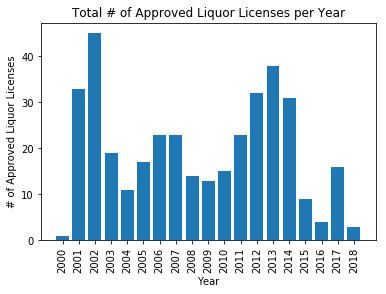

In [14]:
# Bar Chart to show the difference in # of liquor licenses issued in a given year

x_axis = year_count_df['YEAR']
chart_count = year_count_df['TOTAL']
fig = plt.bar(x_axis, chart_count)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, year_count_df['YEAR'], rotation='vertical')

 # Give the chart a title, x label, and y label
plt.title("Total # of Approved Liquor Licenses per Year")
plt.xlabel("Year")
plt.ylabel("# of Approved Liquor Licenses")

plt.savefig("barchart.png", DPI=100)
plt.show()


In [15]:
# Filter data to remove gas stations (7-11, Circle K, Conoco, Shell, My Goods Market, Shop Fast,
#... CVS, Walgreens, Capitol Heights Pharmacy)
liquor_data = liquor_data[~liquor_data.BUS_PROF_NAME.str.contains("7-ELEVEN")]
liquor_data = liquor_data[~liquor_data.BUS_PROF_NAME.str.contains("7 ELEVEN")]
liquor_data = liquor_data[~liquor_data.BUS_PROF_NAME.str.contains("CIRCLE K")]
liquor_data = liquor_data[~liquor_data.BUS_PROF_NAME.str.contains("CONOCO")]
liquor_data = liquor_data[~liquor_data.BUS_PROF_NAME.str.contains("SHELL")]
liquor_data = liquor_data[~liquor_data.BUS_PROF_NAME.str.contains("MY GOODS MARKET")]
liquor_data = liquor_data[~liquor_data.BUS_PROF_NAME.str.contains("SHOP FAST")]
liquor_data = liquor_data[~liquor_data.BUS_PROF_NAME.str.contains("WALGREENS")]
liquor_data = liquor_data[~liquor_data.BUS_PROF_NAME.str.contains("CVS")]
liquor_data = liquor_data[~liquor_data.BUS_PROF_NAME.str.contains("CAPITOL HEIGHTS")]
liquor_data


,index,BFN,BUS_PROF_NAME,FULL_ADDRESS,LICENSES,LIC_STATUS,ISSUE_DATE,END_DATE,ADDRESS_ID,ADDRESS_LINE1,...,CITY,STATE,ZIP,COUNCIL_DIST,POLICE_DIST,CENSUS_TRACT,X_COORD,Y_COORD,YEAR,MMDD
0,3,2013-BFN-1066026,TARGET STORE T-2820,7777 E HAMPDEN AVE,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-06-22 09:07:42,2019-06-26 00:00:00,223542.0,7777 E Hampden Ave,...,Denver,CO,None,4,3,06811,3168865.00,1664167.00,2013,BFN-1066026
1,6,2009-BFN-1043043,EAST 28TH LIQUOR,3513 E 28TH AVE,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-12-26 15:45:17,2019-12-14 00:00:00,246560.0,3513 E 28th Ave,...,Denver,CO,None,9,2,03603,3155715.00,1701123.00,2009,BFN-1043043
3,11,2013-BFN-1070099,MCNALLY'S LIQUOR,1950 S HOLLY STSUITE 1,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-01-26 14:01:57,2019-07-05 00:00:00,360457.0,1950 S Holly St Unit 1,...,Denver,CO,None,6,3,05200,3162773.00,1673627.00,2013,BFN-1070099
4,12,2005-BFN-1014483,BUNGALOW LIQUORS,3000 W ALAMEDA AVE,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-05-31 11:49:49,2019-06-01 00:00:00,93604.0,3000 W Alameda Ave,...,Denver,CO,None,3,4,04502,3133438.00,1684155.00,2005,BFN-1014483
5,16,2003-BFN-1004661,WASHINGTON STREET LIQUORS,757 E 20TH AVE #300,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-07-25 11:22:00,2019-08-21 00:00:00,None,None,...,None,None,None,9,6,02402,3146910.00,1697792.00,2003,BFN-1004661
6,25,2004-BFN-1007861,WATSON'S WINE & SPIRITS,25 E 8TH AVE,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-05-09 11:11:36,2019-05-28 00:00:00,None,None,...,None,None,None,10,6,02702,3144577.00,1691416.00,2004,BFN-1007861
7,26,2006-BFN-1021851,ABC DISCOUNT LIQUOR,5600 W DARTMOUTH AVEUNIT 106,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-10-30 15:51:32,2019-11-20 00:00:00,270082.0,5600 W Dartmouth Ave Unit 106,...,Denver,CO,None,2,4,11902,3124924.00,1663895.00,2006,BFN-1021851
8,43,2012-BFN-1061806,WESTWOOD LIQUORS,4005 MORRISON RD,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-12-13 14:44:41,2019-12-10 00:00:00,222917.0,4005 Morrison Rd,...,Denver,CO,None,3,4,04501,3129417.00,1682520.00,2012,BFN-1061806
9,44,2001-BFN-4402,THE VINEYARD INC,261 N FILLMORE ST,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-11-16 14:49:59,2019-12-31 00:00:00,84892.0,261 N Fillmore St,...,Denver,CO,None,10,3,03800,3153664.00,1687801.00,2001,BFN-4402
10,45,2007-BFN-1026561,FRANK'S LIQUOR,3420 W ALAMEDA AVE,ACTIVE RETAIL LIQUOR LICENSE,LICENSE ISSUED - ACTIVE,2018-06-08 14:27:10.000001,2019-06-17 00:00:00,158174.0,3420 W Alameda Ave,...,Denver,CO,None,3,4,04502,3131770.00,1684164.00,2007,BFN-1026561


In [16]:
# Deleting unnecessary columns for liquor_dataframe (MMDD, X/Y COORDS, CENSUS TRACT, POLICE/COUNCIL DIST, ZIP, ADDRESS LINE1, 
#... ADDRESS ID, ISSUE DATE, INDEX, LIC STATUS, BFN) 

liquor_data = liquor_data.drop(columns=['MMDD', 'Y_COORD', 'X_COORD', 'CENSUS_TRACT', 'POLICE_DIST', 'COUNCIL_DIST', 'ZIP', 
                                'ADDRESS_LINE2', 'ADDRESS_LINE1', 'ADDRESS_ID', 'ISSUE_DATE', 'END_DATE', 'LIC_STATUS', 
                                'BFN', 'index', 'LICENSES'])
liquor_data.head(10)

,BUS_PROF_NAME,FULL_ADDRESS,CITY,STATE,YEAR
0,TARGET STORE T-2820,7777 E HAMPDEN AVE,Denver,CO,2013
1,EAST 28TH LIQUOR,3513 E 28TH AVE,Denver,CO,2009
3,MCNALLY'S LIQUOR,1950 S HOLLY STSUITE 1,Denver,CO,2013
4,BUNGALOW LIQUORS,3000 W ALAMEDA AVE,Denver,CO,2005
5,WASHINGTON STREET LIQUORS,757 E 20TH AVE #300,None,None,2003
6,WATSON'S WINE & SPIRITS,25 E 8TH AVE,None,None,2004
7,ABC DISCOUNT LIQUOR,5600 W DARTMOUTH AVEUNIT 106,Denver,CO,2006
8,WESTWOOD LIQUORS,4005 MORRISON RD,Denver,CO,2012
9,THE VINEYARD INC,261 N FILLMORE ST,Denver,CO,2001
10,FRANK'S LIQUOR,3420 W ALAMEDA AVE,Denver,CO,2007


In [17]:
# Rename Column Headers in Liquor License DF

liquor_data = liquor_data.rename(columns={'BUS_PROF_NAME': 'Business_Name',
                                        'FULL_ADDRESS': 'Business_Address',
                                          'YEAR': 'Year_of_License_Inception',
                                          'CITY': 'City',
                                          'STATE': 'State'
                                         })

# Reorder Columns in Liquor License DF
liquor_data = liquor_data[['Year_of_License_Inception', 'Business_Name', 'Business_Address',
                          'City', 'State']]
liquor_data.head(10)

,Year_of_License_Inception,Business_Name,Business_Address,City,State
0,2013,TARGET STORE T-2820,7777 E HAMPDEN AVE,Denver,CO
1,2009,EAST 28TH LIQUOR,3513 E 28TH AVE,Denver,CO
3,2013,MCNALLY'S LIQUOR,1950 S HOLLY STSUITE 1,Denver,CO
4,2005,BUNGALOW LIQUORS,3000 W ALAMEDA AVE,Denver,CO
5,2003,WASHINGTON STREET LIQUORS,757 E 20TH AVE #300,None,None
6,2004,WATSON'S WINE & SPIRITS,25 E 8TH AVE,None,None
7,2006,ABC DISCOUNT LIQUOR,5600 W DARTMOUTH AVEUNIT 106,Denver,CO
8,2012,WESTWOOD LIQUORS,4005 MORRISON RD,Denver,CO
9,2001,THE VINEYARD INC,261 N FILLMORE ST,Denver,CO
10,2007,FRANK'S LIQUOR,3420 W ALAMEDA AVE,Denver,CO


In [18]:
# Replacing 'None' values titled Denver and CO in "City" & "State' columns 
liquor_data = liquor_data.replace({'City': r'None'}, {'City': 'Denver'}, regex=True)
liquor_data = liquor_data.replace({'State': r'None'}, {'State': 'CO'}, regex=True)
liquor_data.head(10)

,Year_of_License_Inception,Business_Name,Business_Address,City,State
0,2013,TARGET STORE T-2820,7777 E HAMPDEN AVE,Denver,CO
1,2009,EAST 28TH LIQUOR,3513 E 28TH AVE,Denver,CO
3,2013,MCNALLY'S LIQUOR,1950 S HOLLY STSUITE 1,Denver,CO
4,2005,BUNGALOW LIQUORS,3000 W ALAMEDA AVE,Denver,CO
5,2003,WASHINGTON STREET LIQUORS,757 E 20TH AVE #300,Denver,CO
6,2004,WATSON'S WINE & SPIRITS,25 E 8TH AVE,Denver,CO
7,2006,ABC DISCOUNT LIQUOR,5600 W DARTMOUTH AVEUNIT 106,Denver,CO
8,2012,WESTWOOD LIQUORS,4005 MORRISON RD,Denver,CO
9,2001,THE VINEYARD INC,261 N FILLMORE ST,Denver,CO
10,2007,FRANK'S LIQUOR,3420 W ALAMEDA AVE,Denver,CO


In [19]:
                                    # CREATION OF "GROCERY STORE DATAFRAME"

In [20]:
# Filter Business_Name FOR Safeway, King Soopers, Sams Club, Costco, Wal-Mart, Target, Whole Foods

grocery_stores = liquor_data[liquor_data['Business_Name'].str.contains(
    'SAFEWAY|TARGET|COSTCO|KING SOOPERS|SAMS CLUB|WAL MART|WAL-MART|WHOLE FOODS')==True]

grocery_stores = grocery_stores.reset_index()
grocery_stores = grocery_stores.drop(columns=['index'])
grocery_stores.head()

,Year_of_License_Inception,Business_Name,Business_Address,City,State
0,2013,TARGET STORE T-2820,7777 E HAMPDEN AVE,Denver,CO
1,2001,KING SOOPERS #56,2727 W EVANS AVE,Denver,CO
2,2002,KING SOOPERS #7,5125 W FLORIDA AVE,Denver,CO
3,2013,COSTCO WHOLESALE #443,7900 W QUINCY AVE,Denver,CO
4,2002,SAFEWAY STORE #2246,757 E 20TH AVE,Denver,CO


In [21]:
                                    # CREATION OF "LIQUOR STORE DATAFRAME"

In [22]:
# Filter OUT Safeway, King Soopers, Sams Club, Costco, Wal-Mart, Target, Whole Foods, 
#...leaving all remaining independent liquor stores

liquor_stores = liquor_data[liquor_data['Business_Name'].str.contains(
    'SAFEWAY|TARGET|COSTCO|KING SOOPERS|SAMS CLUB|WAL MART|WAL-MART|WHOLE FOODS')==False]

liquor_stores = liquor_stores.reset_index()
liquor_stores = liquor_stores.drop(columns=['index'])
liquor_stores['Year_of_License_Inception'] = liquor_stores['Year_of_License_Inception'].astype(int)
liquor_stores.dtypes


Year_of_License_Inception     int32
Business_Name                object
Business_Address             object
City                         object
State                        object
dtype: object

In [23]:
# BEGINNING TO CREATE HEAT AND LAYER MAPS FROM ABOVE DATAFRAMES USING GOOGLE API 

In [24]:
# Pull Lat and long from goole API for Grocery Store DataFrame
    # active_liq_lic = data['FULL_ADDRESS'].head()
latlongs = grocery_stores['Business_Address']
lat = []
long = []
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

for address in latlongs:
    params = {"address": address, "key": gkey}
    response = requests.get(base_url, params=params)
    response_json = response.json()
    lat.append(response_json["results"][0]["geometry"]["location"]["lat"])
    long.append(response_json["results"][0]["geometry"]["location"]["lng"])
    


In [25]:
# Pull the lat and long for the Liquor Store DataFrame and append to the lat and long "license list"

latlongslicences = liquor_stores['Business_Address']
lat_license = []
long_license = []
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
bounds = "39.614537,-105.229104|39.905614,-104.601426"

for address in latlongslicences:
    params = {"address": address, "key": gkey, "bounds":bounds}
    response = requests.get(base_url, params=params)
    response_json = response.json()
#     print(response.url)
    if len(response_json["results"])==0:
        #TODO: Ignore it? 
#         print(f'{response.url} did not have any results! Skipping it...')
        lat_license.append(float(39.7392))
        long_license.append(float(-104.9903))

    else : 
        lat_license.append(response_json["results"][0]["geometry"]["location"]["lat"])
        long_license.append(response_json["results"][0]["geometry"]["location"]["lng"])

    

In [40]:
# Create new columns in the dataframe for the latitudes and longitudes for both the grocery stores data frame 
#...and the liquor stores data frame.
liquor_stores["Latitude"] = lat_license
liquor_stores["Longitude"] = long_license
grocery_stores["Latitude"] = lat
grocery_stores["Longitude"]= long

# Create new DataFrames for Pre and Post 2016 Liquor Licenses
liquor_stores_pre2016 = liquor_stores.loc[liquor_stores['Year_of_License_Inception'] <= 2015]
liquor_stores_2016plus = liquor_stores.loc[liquor_stores['Year_of_License_Inception'] > 2015]
liquor_stores_2016plus_reset_index = liquor_stores_2016plus.reset_index()
liquor_stores_2016plus_new = liquor_stores_2016plus_reset_index.drop(columns=['index'])

liquor_stores_2016plus_new.head()


,Year_of_License_Inception,Business_Name,Business_Address,City,State,Latitude,Longitude
0,2016,GOPUFF,209 N YUMA,Denver,CO,39.720800,-105.015559
1,2017,SAVE-A-LOT PECOS,4860 N PECOS ST,Denver,CO,39.784611,-105.005565
2,2017,SAVE-A-LOT LEETSDALE,7150 LEETSDALE DR# 350,Denver,CO,39.697640,-104.905214
3,2017,DENVER FINE WINES,100 S MADISON STSTE 3B,Denver,CO,39.714488,-104.945958
4,2018,CHOICE MARKET,1770 N BROADWAY,Denver,CO,39.744453,-104.987074


In [33]:
# Create the a heatmap for liquor stores Pre-2016 over the symbol layer map of grocery stores
   # Heatmap and Symbol Layer Maps created in code below

fig = gmaps.figure(center=(39.7392,-104.9903), zoom_level=12)
grocery_locations = grocery_stores[['Latitude','Longitude']]
grocery_names = grocery_stores['Business_Name']
active_liquor_locations_pre2016 = liquor_stores_pre2016[['Latitude','Longitude']]
symbol_layer_pre = gmaps.symbol_layer((grocery_locations),hover_text=grocery_names, fill_color='red', stroke_color='blue', 
                                      stroke_opacity=.6, scale=7)
heatmap_layer = gmaps.heatmap_layer(active_liquor_locations_pre2016, dissipating=True, max_intensity=1, opacity=1)
fig.add_layer(symbol_layer_pre)
fig.add_layer(heatmap_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [42]:
# Create Post-2016 symbol layer to blanket heatmap containg liquor stores Pre-2016 and grocery store markers
   # Heatmap and Symbol Layer Maps created in code below
    
fig = gmaps.figure(center=(39.7392,-104.9903), zoom_level=12)
grocery_locations = grocery_stores[['Latitude','Longitude']]
grocery_names = grocery_stores['Business_Name']
liquor_location_2016plus_names = liquor_stores_2016plus_new['Business_Name']
active_liquor_locations_pre2016 = liquor_stores_pre2016[['Latitude','Longitude']]
active_liquor_locations_2016plus = liquor_stores_2016plus_new[['Latitude','Longitude']]
symbol_layer_grocery = gmaps.symbol_layer((grocery_locations),fill_color='red', stroke_color='blue', stroke_opacity=.6, 
                                          scale=7,info_box_content=grocery_names)
symbol_layer_plus = gmaps.symbol_layer((active_liquor_locations_2016plus),fill_color='green', stroke_color='green', 
                                       stroke_opacity=1, scale=7, info_box_content=liquor_location_2016plus_names)
heatmap_layer = gmaps.heatmap_layer(active_liquor_locations_pre2016, dissipating=True, max_intensity=1, opacity=1)
fig.add_layer(symbol_layer_plus)
fig.add_layer(symbol_layer_grocery)
fig.add_layer(heatmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#Swish